## GDP ESTIMATION USING SATELLITE IMAGES

This project focuses on an innovative approach of estimating GDP for a specific region, by utilizing the region's satellite (nighttime) images. 

In [2]:
# Import dependencies

# For handling Geospatial data
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# For data manupulation
import pandas as pd

import numpy as np
import os

### SATELLITE IMAGE DOWNLOAD

Monthly average radiance composite images were sourced from the Visible Infrared Imaging Radiometer Suite (VIIRS) Day/Night Band (DNB) provided by the Earth Observation Group (EOG) for the years 2012-2021. Make sure to save the downloaded images in a directory accessible to your notebook.

Subsequently, subnational administrative boundary shape files, were obtained from the Office for the Coordination of Humanitarian Affairs (OCHA), were systematically applied to the sourced satellite imagery using Python-based geospatial libraries such as Rasterio and GeopandasNote. Shapefile source - https://data.humdata.org/dataset/cod-ab-zaf 

#### PROVINCIAL SATELLITE IMAGE EXTRACTION

In this step, we used the geopandas library to read the shapefiles and rasterio library to open and manipulate the satellite images and extract specific provinces from the satellite images.

In [ ]:
# # define a counter to keep track of the no. of iterations in the loop
# counter = 0 

# for province in province_names:
#     for year in years:
#         for month in months:
#             image_path = f"nightlight_images/{province}/{year}_{province}_{month}.tif"
#             shapefile_path = f"shape_files/{province}/{province}.shp"

#             # Load the shapefile
#             shp = gpd.read_file(shapefile_path)

#             # Open the image file
#             with rasterio.open(image_path) as src:
#                 # Use the bounds of the shapefile to read the image subset
#                 subset_image, subset_transform = mask(src, shp.geometry, crop=True)

#             # save the extracted image as a new file
#             output_path = f"shaped_images/{province}/{year}_{province}_{month}.tif"

#             # Create a new raster file and write the extracted image subset to it.
#             with rasterio.open(output_path, 'w', driver='GTiff', height=subset_image.shape[1], width=subset_image.shape[2], count=1, dtype=subset_image.dtype) as dst:
#                 dst.write(subset_image)

#             # Increment the counter variable and print the current iteration
#             counter += 1
#             print(f"{counter} - {year}_{province}_{month}")

### LIGHT INTENSITY CALCULATION

In the next cell, we computed the nightlight intensity values for each province. Specifically, we calculated the mean intensity, median intensity, minimum intensity, and maximum intensity for each month at the provincial level.

In [7]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define the threshold value
threshold = 80

# Function to calculate nightlight intensity values and percentage of light versus area
def calculate_nightlight_stats(image_path):
    # Open the image file
    with rasterio.open(image_path) as src:
        # Read the image data
        image = src.read(1)   # We use 1 because our image is a single-band image
        image = image.astype(np.uint8) 

        # Calculate the statistics
        sum_of_intensity = np.sum(image)
        mean_intensity = round(image.mean(), 3)
        # minimum_intensity = round(image.min(), 2)
        # maximum_intensity = round(image.max(), 2)
        # intensity_median = np.median(image)

        # Calculate the percentage of light versus area
        binary_mask = np.where(image > threshold, 1, 0)
        light_pixels = np.sum(binary_mask)
        total_pixels = binary_mask.size
        percentage_light = round((light_pixels / total_pixels) * 100, 5)              

    return [sum_of_intensity, mean_intensity, percentage_light] #minimum_intensity, maximum_intensity

# Create a list of features
features = [
    'province', 'year',
    'jan_sum', 'jan_mean', 'jan_percentage_light', 
    'feb_sum', 'feb_mean', 'feb_percentage_light', 
    'mar_sum', 'mar_mean', 'mar_percentage_light', 
    'apr_sum', 'apr_mean', 'apr_percentage_light', 
    'may_sum', 'may_mean', 'may_percentage_light', 
    'jun_sum', 'jun_mean', 'jun_percentage_light', 
    'jul_sum', 'jul_mean', 'jul_percentage_light',  
    'aug_sum', 'aug_mean', 'aug_percentage_light', 
    'sept_sum', 'sept_mean', 'sept_percentage_light', 
    'oct_sum', 'oct_mean', 'oct_percentage_light', 
    'nov_sum', 'nov_mean', 'nov_percentage_light', 
    'dec_sum', 'dec_mean', 'dec_percentage_light',
]

# Create a list of province names and years
province_names = ["eastern_cape", "free_state", "gauteng", "kwazulu_natal", "limpopo", "mpumalanga", "north_west", "northern_cape", "western_cape"]
years = [2012,2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

months = []
for x in range(1, 13):
    if len(str(x)) != 2:
        x = f"0{x}"
        months.append(x)
    else:
        months.append(str(x))

main_list= [] # Create an empty list to store the intensity values
for province in province_names:
    for year in years:
        row_values = [province, year] #['eastern_cape', 2013]
        for month in months:
            if year == 2012 and int(month) < 4:
                calculated_values = [None, None, None]

            else:         
                # Provide the path to your satellite image
                image_path = f"province_images/{province}/{year}_{province}_{month}.tif"
                # image_path = os.path.join("province_images", f"{year}_{province}_{month}.tif")

                # Uncomment to print the calculated intensity values
                calculated_values = calculate_nightlight_stats(image_path) # -> [sum_of_intensity, mean_intensity, percentage_light]
                print(f"Values for {province} - {year} - {month}: {calculated_values}")

            # Call the function to calculate the intensity and percentage of light versus area
            row_values.extend(calculated_values) # += calculate_nightlight_stats(image_path) 
        main_list.append(tuple(row_values))

# Convert the list of tuples to a DataFrame
df_1 = pd.DataFrame(main_list, columns=features)



Values for eastern_cape - 2012 - 04: [106100, 0.059, 0.00083]
Values for eastern_cape - 2012 - 05: [104478, 0.058, 0.00116]
Values for eastern_cape - 2012 - 06: [114315, 0.063, 0.00216]
Values for eastern_cape - 2012 - 07: [138378, 0.077, 0.00332]
Values for eastern_cape - 2012 - 08: [177170, 0.098, 0.00996]
Values for eastern_cape - 2012 - 09: [118383, 0.066, 0.0021]
Values for eastern_cape - 2012 - 10: [87354, 0.048, 0.00083]
Values for eastern_cape - 2012 - 11: [91919, 0.051, 0.00116]
Values for eastern_cape - 2012 - 12: [94015, 0.052, 0.00094]
Values for eastern_cape - 2013 - 01: [90578, 0.05, 0.00083]
Values for eastern_cape - 2013 - 02: [99304, 0.055, 0.00116]
Values for eastern_cape - 2013 - 03: [111706, 0.062, 0.00127]
Values for eastern_cape - 2013 - 04: [103536, 0.057, 0.00089]
Values for eastern_cape - 2013 - 05: [112171, 0.062, 0.00138]
Values for eastern_cape - 2013 - 06: [129798, 0.072, 0.0021]
Values for eastern_cape - 2013 - 07: [131516, 0.073, 0.00166]
Values for easte

In [ ]:
# Save as csv for reusuability
df_1.to_csv('SA_provincial_monthly_light_intensity_data.csv', index=False)


### DEALING WITH NULL VALUES

In [ ]:
df_1 = pd.read_csv('SA_provincial_monthly_light_intensity_data.csv')
df_1.head(2)

In [10]:
# Iterate over rows
for index, row in df_1.iterrows():
    # Iterate over columns
    for col in df_1.columns:
        # Check if the value is NaN
        if pd.isna(row[col]):
            # Identify column type and replace NaN with the mean of other columns of the same type
            if 'sum' in col:
                sum_columns = [col for col in df_1.columns if 'sum' in col]
                type_value = row[sum_columns].mean()
                # Round only if it's a "sum" column
                df_1.at[index, col] = round(type_value, 1) if 'sum' in col else type_value
            elif 'mean' in col:
                type_columns = [col for col in df_1.columns if 'mean' in col]  
                type_value = row[type_columns].mean()
                df_1.at[index, col] = round(type_value, 3)                          
            elif 'percentage' in col:
                type_columns = [col for col in df_1.columns if 'percentage' in col]
                type_value = row[type_columns].mean()
                df_1.at[index, col] = round(type_value, 5)

# Print the updated DataFrame
df_1.head()

,province,year,jan_sum,jan_mean,jan_percentage_light,feb_sum,feb_mean,feb_percentage_light,mar_sum,mar_mean,...,sept_percentage_light,oct_sum,oct_mean,oct_percentage_light,nov_sum,nov_mean,nov_percentage_light,dec_sum,dec_mean,dec_percentage_light
0,eastern_cape,2012,114679.1,0.064,0.00250,114679.1,0.064,0.00250,114679.1,0.064,...,0.00210,87354,0.048,0.00083,91919,0.051,0.00116,94015,0.052,0.00094
1,eastern_cape,2013,90578.0,0.050,0.00083,99304.0,0.055,0.00116,111706.0,0.062,...,0.01472,139123,0.077,0.00487,97429,0.054,0.00122,98775,0.055,0.00105
2,eastern_cape,2014,137609.0,0.076,0.00188,100548.0,0.056,0.00094,105995.0,0.059,...,0.00293,116701,0.065,0.00465,90913,0.050,0.00083,90072,0.050,0.00083
3,eastern_cape,2015,103511.0,0.057,0.00132,104311.0,0.057,0.00110,99117.0,0.054,...,0.00088,104936,0.058,0.00137,95964,0.053,0.00077,87624,0.048,0.00071
4,eastern_cape,2016,95769.0,0.053,0.00126,94395.0,0.052,0.00137,86086.0,0.047,...,0.00126,91806,0.050,0.00132,98311,0.054,0.00088,120023,0.066,0.00308


## FEATURE ENGINEERING

We computed the sum of the mean, median, minimum, and maximum values for each province and for each year, resulting in aggregate values that provide a consolidated measure of nightlight intensity. We expanded our feature list to include:

- mean_sum: The sum of the mean nightlight intensity values for the month.
- median_sum: The sum of the median nightlight intensity values for the month.
- min_sum: The sum of the minimum nightlight intensity values for the month.
- max_sum: The sum of the maximum nightlight intensity values for the month.

By incorporating these sum values, we have enriched our feature set and captured the cumulative effects of nightlight intensity over time which can potentially enhance the predictive power of our models

In [13]:
new_cols_list = []

# Iterate over each row in df_1
for i, row in df_1.iterrows():
    avg_sum_of_intensity, avg_mean, sum_of_percentage_light = [], [], []
    
    # Iterate over each column in the row
    for col in list(row.index):
        # Check if the column name contains 'mean'
        if 'sum' in col: 
            avg_sum_of_intensity.append(row[col]) # Add the value to the mean_sum list
        elif 'mean' in col:
            avg_mean.append(row[col])
        elif 'percentage' in col:
            sum_of_percentage_light.append(row[col])
        
    # Append the sum of each list as a tuple to the new_cols_list    
    new_cols_list.append((round(np.mean(avg_sum_of_intensity), 0), round(np.mean(avg_mean), 4), round(sum(sum_of_percentage_light), 3)))
    
# Convert the list of tuples to a DataFrame called df_2
df_2 = pd.DataFrame(new_cols_list, columns = ['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light'])

# Merge the DataFrames horizontally
df = pd.concat([df_1, df_2], axis=1)

# save the dataframe as a csv file, index set to false to exclude the dataframes index being saved as a separate column
df.to_csv('SA_intensity_data_2012-2020.csv', index=False)
df.head(10)

,province,year,jan_sum,jan_mean,jan_percentage_light,feb_sum,feb_mean,feb_percentage_light,mar_sum,mar_mean,...,oct_percentage_light,nov_sum,nov_mean,nov_percentage_light,dec_sum,dec_mean,dec_percentage_light,avg_sum_of_intensity,avg_mean,sum_of_percentage_light
0,eastern_cape,2012,114679.1,0.064,0.00250,114679.1,0.064,0.00250,114679.1,0.064,...,0.00083,91919,0.051,0.00116,94015,0.052,0.00094,114679.0,0.0637,0.030
1,eastern_cape,2013,90578.0,0.050,0.00083,99304.0,0.055,0.00116,111706.0,0.062,...,0.00487,97429,0.054,0.00122,98775,0.055,0.00105,131288.0,0.0728,0.046
2,eastern_cape,2014,137609.0,0.076,0.00188,100548.0,0.056,0.00094,105995.0,0.059,...,0.00465,90913,0.050,0.00083,90072,0.050,0.00083,125663.0,0.0696,0.033
3,eastern_cape,2015,103511.0,0.057,0.00132,104311.0,0.057,0.00110,99117.0,0.054,...,0.00137,95964,0.053,0.00077,87624,0.048,0.00071,107337.0,0.0589,0.025
4,eastern_cape,2016,95769.0,0.053,0.00126,94395.0,0.052,0.00137,86086.0,0.047,...,0.00132,98311,0.054,0.00088,120023,0.066,0.00308,105689.0,0.0581,0.020
5,eastern_cape,2017,96142.0,0.053,0.00099,110580.0,0.061,0.00121,106290.0,0.058,...,0.00082,94052,0.052,0.00066,87472,0.048,0.00066,105711.0,0.0582,0.013
6,eastern_cape,2018,93878.0,0.052,0.00082,85448.0,0.047,0.00027,101670.0,0.056,...,0.00055,117294,0.064,0.00165,103198,0.057,0.00066,102006.0,0.0561,0.009
7,eastern_cape,2019,95381.0,0.052,0.00077,87656.0,0.048,0.00049,88145.0,0.048,...,0.00082,103198,0.057,0.00077,96179,0.053,0.00110,101276.0,0.0557,0.010
8,eastern_cape,2020,68380.0,0.038,0.00022,80556.0,0.044,0.00027,91583.0,0.050,...,0.00099,87214,0.048,0.00022,69665,0.038,0.00016,97867.0,0.0537,0.012
9,free_state,2012,82570.0,0.066,0.00189,82570.0,0.066,0.00189,82570.0,0.066,...,0.00104,75210,0.060,0.00088,70336,0.056,0.00119,82570.0,0.0658,0.023


In [14]:
# Load the economic dataset
gdp_df = pd.read_csv("SA_gdp_by_province.csv")
gdp_df.head(2)

,year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas and water",Construction,"Trade, catering and accommodation","Transport, storage and communication","Finance, real estate and business services",Personal services,General government services,Taxes less subsidies on products,GDPR at market prices,province
0,1995,4942.731047,442.546983,17263.25801,1637.212870,3367.844365,10881.09145,6902.876448,16740.44129,3595.257547,8770.439792,6636.710172,81180.40997,Western Cape
1,1996,5297.576761,421.524437,18507.58246,1682.899429,3452.603466,12185.92732,8038.513784,18154.31188,4051.599287,10913.416890,7140.929873,89846.88559,Western Cape


After reading the economic data, relevant columns are extracted into a dataframe called df_3.

Next, change province name for uniformity - Observing that the naming convention for provinces in the economic dataset differs from that of the light intensity dataset, we decided to rename the provinces to ensure uniformity and consistency. This enables seamless integration and comparison of data between the two datasets.

In [15]:
# Initialize an empty list called cols_list
cols_list = []

temp_df = gdp_df[['year', 'GDPR at market prices', 'province']] # Create a temporary DataFrame with selected columns
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] # Define a list of years

# Iterate over each row in the temporary DataFrame
for i, row in temp_df.iterrows():
    # Iterate over each year in the years list
    for year in years:
        if year == row['year']:
            cols_list.append((row['province'], row['GDPR at market prices']))
              
# Create a new DataFrame df_3 using the cols_list 
df_3 = pd.DataFrame(cols_list, columns = ['province_name', 'GDPR'])

# Define a dictionary for replacements of the province names
replacement_dict = {
    'Western Cape': 'western_cape', 
    'Eastern Cape': 'eastern_cape',
    'Northern Cape': 'northern_cape',
    'Free State': 'free_state',
    'KwaZulu-Natal': 'kwazulu_natal', 
    'North West': 'north_west', 
    'Gauteng': 'gauteng', 
    'Mpumalanga': 'mpumalanga',
    'Limpopo': 'limpopo'
}

# Replace multiple values in the 'province_name' column
df_3['province_name'] = df_3['province_name'].replace(replacement_dict)
df_3.head()

,province_name,GDPR
0,western_cape,447228.3763
1,western_cape,486784.9499
2,western_cape,517720.1873
3,western_cape,552539.4773
4,western_cape,596895.7015


In the cell below we merged and concatenated multiple DataFrames to consolidate the data.

In [47]:
data_list = [] # Initialize an empty list called data_list to store DataFrames

# Filter out the rows with the year 2020 in df to avoid getting null values in the GDPR column
df = df[df['year'] != 2020]

# Iterate over the unique province names in the 'province_name' column of df_3
for pro in df_3['province_name'].unique():
    data_list.append(df[df['province'] == pro]) # Append a DataFrame filtered by province to the data_list

# Concatenate the DataFrames
df_4 = pd.concat(data_list)
df_4 = df_4.reset_index(drop=True)

# Merge the DataFrames horizontally by concatenating df_4 and df_3
df_5 = pd.concat([df_4, df_3], axis=1)
df_5 = df_5.reset_index(drop=True)

# Drop the 'province_name' column from df_5
df_5 = df_5.drop('province_name', axis = 1) 

df_5.to_csv('SA_GDP_estimation_dataset.csv', index=False)

df_5.head()


,province,year,jan_sum,jan_mean,jan_percentage_light,feb_sum,feb_mean,feb_percentage_light,mar_sum,mar_mean,...,nov_sum,nov_mean,nov_percentage_light,dec_sum,dec_mean,dec_percentage_light,avg_sum_of_intensity,avg_mean,sum_of_percentage_light,GDPR
0,western_cape,2012,193532.2,0.118,0.00527,193532.2,0.118,0.00527,193532.2,0.118,...,208584,0.127,0.00690,205144,0.125,0.00629,193532.0,0.1181,0.063,447228.3763
1,western_cape,2013,224927.0,0.137,0.00764,227562.0,0.139,0.01020,219434.0,0.134,...,226844,0.139,0.00635,239486,0.146,0.00849,222220.0,0.1358,0.082,486784.9499
2,western_cape,2014,214289.0,0.131,0.00525,228063.0,0.139,0.00800,207453.0,0.127,...,242119,0.148,0.00843,233676,0.143,0.00660,222003.0,0.1357,0.079,517720.1873
3,western_cape,2015,242976.0,0.148,0.00749,275969.0,0.168,0.01175,228045.0,0.139,...,227902,0.139,0.00524,221432,0.135,0.00475,232594.0,0.1418,0.084,552539.4773
4,western_cape,2016,295547.0,0.180,0.01821,283185.0,0.172,0.01547,232601.0,0.142,...,248410,0.151,0.00719,257307,0.157,0.01005,240238.0,0.1463,0.095,596895.7015


## MODELLINGMODEL BUILDING AND TESTING

#### FEATURE NORMALIZATION
Prior to proceeding with the modeling phase, several essential steps like, "data splitting", "label encoding" and "feature scaling" were taken further prepare the data.

The data was split into a training set and a test set to avoid data leakage during the testing process. The training set comprises data from 2012 to 2018, while the test set contains data from 2019 to 2020. The test set does not include the response variable.

Categorical features present in the Dataframe. This encoding process was necessary because regression models typically expects variables to be in numerical format. Machine learning algorithms often necessitate numerical data as their input, and by encoding the 'province' column, we ensured compatibility with the algorithm.

We normalized the dataset using a python sklearn module to bring them to a similar scale and prevent features with larger magnitudes from dominating the model training process. 

In [48]:
# Load the final dataframe
df_5 = pd.read_csv('SA_GDP_estimation_dataset.csv')

# Defining the train dataset
train_df = df_5[df_5['year'] != 2019]
train_df.tail()

,province,year,jan_sum,jan_mean,jan_percentage_light,feb_sum,feb_mean,feb_percentage_light,mar_sum,mar_mean,...,nov_sum,nov_mean,nov_percentage_light,dec_sum,dec_mean,dec_percentage_light,avg_sum_of_intensity,avg_mean,sum_of_percentage_light,GDPR
66,limpopo,2014,86950.0,0.086,0.00109,85933.0,0.085,0.00119,91813.0,0.091,...,94118,0.093,0.00099,84103,0.083,0.00060,113169.0,0.1121,0.031,273225.0781
67,limpopo,2015,118568.0,0.117,0.00099,103429.0,0.102,0.00099,106554.0,0.105,...,133228,0.132,0.00543,97141,0.096,0.00020,114664.0,0.1132,0.024,289105.8803
68,limpopo,2016,97511.0,0.096,0.00109,97581.0,0.096,0.00099,99108.0,0.098,...,91522,0.090,0.00089,91332,0.090,0.00030,108176.0,0.1068,0.012,315779.6974
69,limpopo,2017,100413.0,0.099,0.00069,113648.0,0.112,0.00059,105942.0,0.105,...,121896,0.120,0.00119,121298,0.120,0.00020,122246.0,0.1208,0.009,340272.8482
70,limpopo,2018,127356.0,0.126,0.00059,118761.0,0.117,0.00089,141477.0,0.140,...,143309,0.142,0.00040,116053,0.115,0.00059,132008.0,0.1305,0.011,359885.0451


Testing several models to pick the best performing model 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Define the features and response variables
X = train_df[['province', 'year', 'avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']]  # Relevant feature columns
y = train_df['GDPR']  # Response variable

# Make a copy to avoid "SettingWithCopy" Warning
X = X.copy()

# Label encode 'province' column
label_encoder = LabelEncoder()
X['province'] = label_encoder.fit_transform(X['province'])

# Define numerical features for scaling
numerical_features = ['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    XGBRegressor()
]

# Perform training, prediction, and evaluation for each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = model.__class__.__name__
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R2) Score: {r2}")
    print(f"{model_name} - Root Mean Squared Error (RMSE): {rmse}")
    print()

LinearRegression - Mean Squared Error: 3306225112.3039265
LinearRegression - R-squared (R2) Score: 0.9525416348821251
LinearRegression - Root Mean Squared Error (RMSE): 57499.78358484427

Ridge - Mean Squared Error: 3447481226.076833
Ridge - R-squared (R2) Score: 0.9505140100245136
Ridge - Root Mean Squared Error (RMSE): 58715.25547995881

Lasso - Mean Squared Error: 3306074342.1251383
Lasso - R-squared (R2) Score: 0.9525437990742024
Lasso - Root Mean Squared Error (RMSE): 57498.472519929936

RandomForestRegressor - Mean Squared Error: 3752415704.53609
RandomForestRegressor - R-squared (R2) Score: 0.9461369058273758
RandomForestRegressor - Root Mean Squared Error (RMSE): 61256.96453903091

GradientBoostingRegressor - Mean Squared Error: 1546034438.8576062
GradientBoostingRegressor - R-squared (R2) Score: 0.9778078429653617
GradientBoostingRegressor - Root Mean Squared Error (RMSE): 39319.644439613214

KNeighborsRegressor - Mean Squared Error: 16105773646.72155
KNeighborsRegressor - R-s

Given the small dataset, it was important to consider both the R-squared score (indicating the proportion of variance explained by the model) and the RMSE (indicating the average magnitude of the errors). 

From the evaluation results, models like Gradient Boosting Regressor and XGBoost Regressor appear to perform well, showing high R-squared scores and relatively low RMSE values. These models are often robust and can handle small datasets effectively.

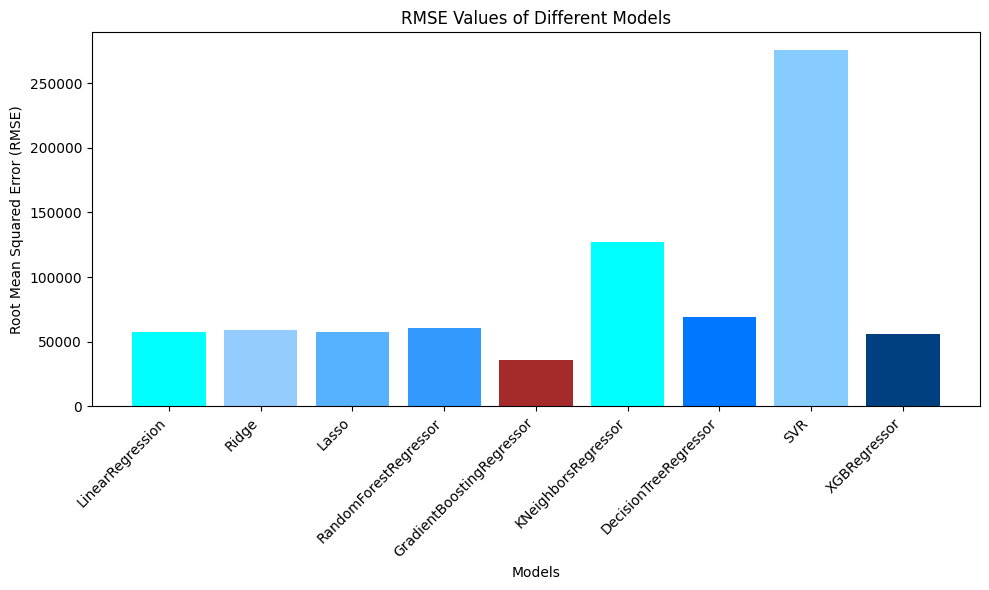

In [46]:
import matplotlib.pyplot as plt

# List of models
models = ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor", "GradientBoostingRegressor", 
            "KNeighborsRegressor", "DecisionTreeRegressor", "SVR", "XGBRegressor"]

# Corresponding RMSE values
rmse_values = [57499.78, 58715.26, 57498.47, 60942.76, 35904.51, 126908.52, 69117.09, 275599.32, 55714.20]

# Specify colors for each bar
# colors = ['cyan', 'blue', 'green', 'orange', 'red', 'purple', 'brown', 'gray', 'black']
# colors = ['#00FFFF', '#0000FF', '#00FF00', '#FFA500', '#FF0000', '#800080', '#A52A2A', '#808080', '#000000']
colors = ['#00FFFF', '#95CCFF', '#56B2FF', '#3399FF', '#A52A2A', '#00FFFF', '#0077FF', '#87CCFF', '#004080' ]


# # Find the smallest RMSE value
# min_rmse = min(rmse_values)

# Create a bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=colors)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Values of Different Models')
plt.xticks(rotation=45, ha='right')

# # Set y-axis limit starting from the smallest RMSE value
# plt.ylim(min_rmse - 10000, max(rmse_values) + 5000)

plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('rmse_plot.png')
# Show the plot
plt.show()


Predictions and Testing Using just the best performing model (Gradient Boosting).

In [38]:
#Defining the train dataset
train_df = df_5[df_5['year'] != 2019]

In [39]:
X = train_df[['province', 'year', 'avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']]  # Relevant feature columns
y = train_df['GDPR']  # Response variable

# Make a copy to avoid "SettingWithCopy" Warning
X = X.copy()

# Label encode 'province' column
label_encoder = LabelEncoder()
X['province'] = label_encoder.fit_transform(X['province'])

# Define numerical features for scaling
numerical_features = ['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create an Gradient Boosting regressor model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print("GradientBoostingRegressor Model")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

GradientBoostingRegressor Model
Mean Squared Error: 1532441556.7815535
R-squared (R2) Score: 0.9780029585242416
Root Mean Squared Error (RMSE): 39146.41179957052


In [41]:
#Using pickle to save the gradient boosting model

import pickle 

model_save_path = "C:/Users/pc/Desktop/P_Dev/Explore_Internship/GDP_Project/trained_models/gb_model.pk"
with open(model_save_path,'wb') as file:
    pickle.dump(gb_model ,file)

In [100]:
# model_save_path = "C:/Users/pc/Desktop/P_Dev/Explore_Internship/GDP_Project/trained_models/xgb_model.pk"
# with open(model_save_path,'wb') as file:
#     pickle.dump(xgb_model ,file)

### Predicting Real Dataset

In [42]:
# DEFINING THE TEST DATASET TO INCLUDE 2019 AND 2020
sa_data = pd.read_csv('SA_intensity_data_2012-2020.csv')

#  Filter rows from df for the year 2020
test_df = sa_data[sa_data['year'] > 2018]

test_df = test_df[['province', 'year', 'avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
test_df['province'] = label_encoder.fit_transform(test_df['province'])

# Define numerical features for scaling
numerical_features = ['avg_sum_of_intensity', 'avg_mean', 'sum_of_percentage_light']

# Scale numerical features
scaler = StandardScaler()
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])


In [43]:
val = test_df
prediction = gb_model.predict(val)
prediction

array([ 303835.33971456,  293728.51878873,  251890.80333792,
        251890.80333792, 1448600.60406582, 1673258.97933047,
        709236.10427896,  655868.22082087,  318068.68717135,
        361359.81004005,  343631.36159767,  357630.95426415,
        315096.86064606,  315368.40178486,   99937.44181992,
         99937.44181992,  638331.21334249,  608136.10652751])